Question 1: Data

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

b. Download Tezos's historical daily data via yahoo finance

In [3]:
initial_data = yf.download("XTZ-USD", start="2020-11-28", end="2022-11-28")

[*********************100%***********************]  1 of 1 completed


Plot the movement (shape) of Tezos over this time period and calculate its annualised volatility

In [4]:
data = yf.download("XTZ-USD", start="2020-11-28", end="2022-11-28")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-23,0.966857,1.001512,0.965235,1.000509,1.000509,19652635
2022-11-24,1.000691,1.016853,0.993055,1.005854,1.005854,21553664
2022-11-25,1.005922,1.006645,0.977130,0.988234,0.988234,14940805
2022-11-26,0.988163,1.010467,0.980543,0.986488,0.986488,25567280
2022-11-27,0.986553,1.010601,0.982201,0.990803,0.990803,13301502


In [6]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-11-28 to 2022-11-27
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


array([<AxesSubplot:xlabel='Date'>], dtype=object)

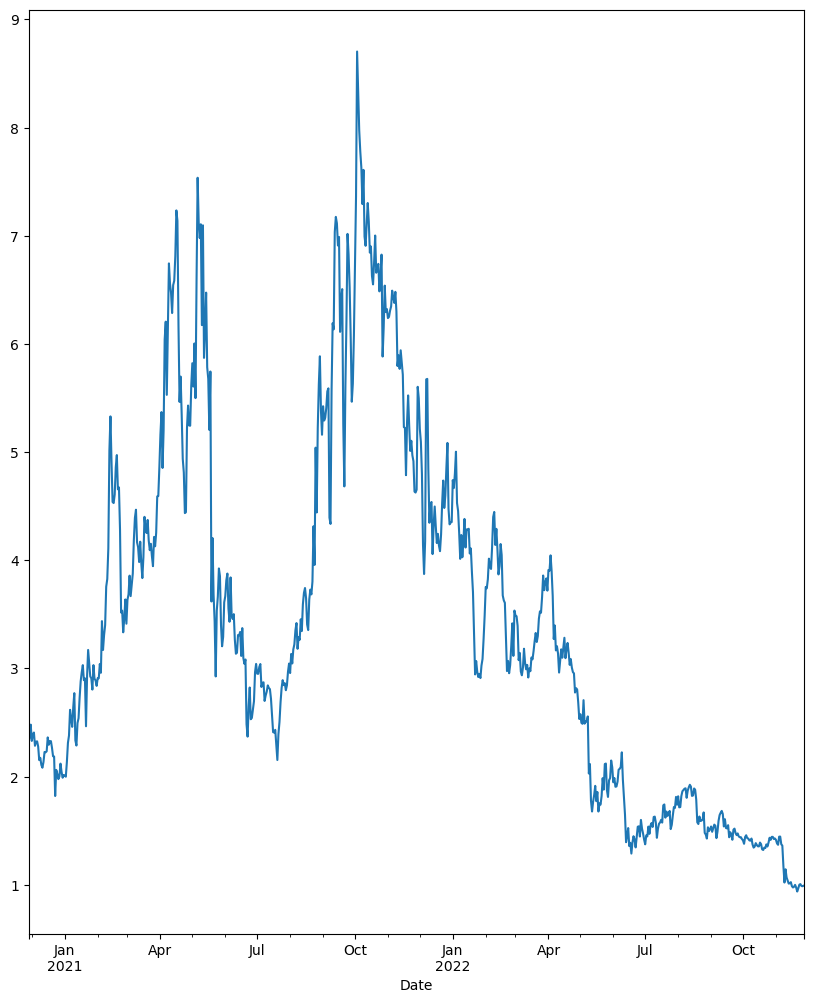

In [7]:
ADJ.plot(figsize=(10, 12), subplots=True)

In [8]:
ADJ.describe().round(2)

count    730.00
mean       3.41
std        1.69
min        0.94
25%        1.91
50%        3.12
75%        4.40
max        8.70
Name: Adj Close, dtype: float64

In [9]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

Date
2020-11-28       NaN
2020-11-29    0.0154
2020-11-30    0.0492
2020-12-01   -0.0625
2020-12-02    0.0255
Name: Adj Close, dtype: float64

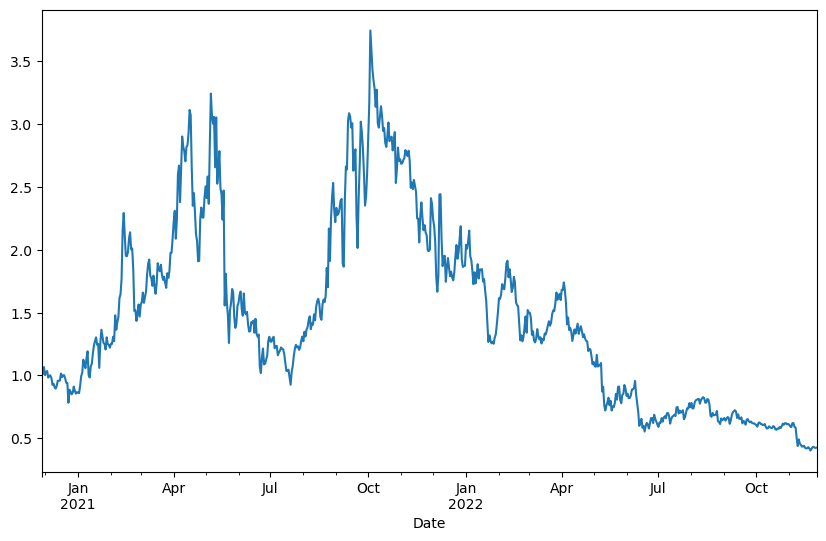

In [10]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-28,2.252338,2.428769,2.215001,2.324912,2.324912,231667778
2020-11-29,2.324979,2.434491,2.285650,2.360903,2.360903,206799141
2020-11-30,2.361126,2.533301,2.336569,2.480068,2.480068,250350582
2020-12-01,2.481717,2.546356,2.248659,2.329803,2.329803,307228805
2020-12-02,2.329260,2.411185,2.299241,2.389883,2.389883,191946336


In [12]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-23,0.966857,1.001512,0.965235,1.000509,1.000509,19652635
2022-11-24,1.000691,1.016853,0.993055,1.005854,1.005854,21553664
2022-11-25,1.005922,1.006645,0.977130,0.988234,0.988234,14940805
2022-11-26,0.988163,1.010467,0.980543,0.986488,0.986488,25567280
2022-11-27,0.986553,1.010601,0.982201,0.990803,0.990803,13301502


In [13]:
import numpy as np
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.015480565433351641,
 0.050474306843480005,
 -0.060589056560277535,
 0.025787610231866837,
 0.007288583201581501]

In [14]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.01536196392641713,
 0.04924178297761869,
 -0.06250225606416174,
 0.02546071774827324,
 0.007262149842485288]

In [15]:
data = yf.download("XTZ-USD", start="2022-08-28", end="2022-11-28")

[*********************100%***********************]  1 of 1 completed


In [16]:
datanr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = datanr.mean() * 365
nv = datanr.std() * (365 ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.35356619 and its annulized volatility is 1.24638505


In [17]:
datalr = pd.DataFrame(log_return, columns = ['log']) 
lr = datalr.mean() * 365
lv = datalr.std() * (365 ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is -0.42704588 and its annulized volatility is 1.25534450


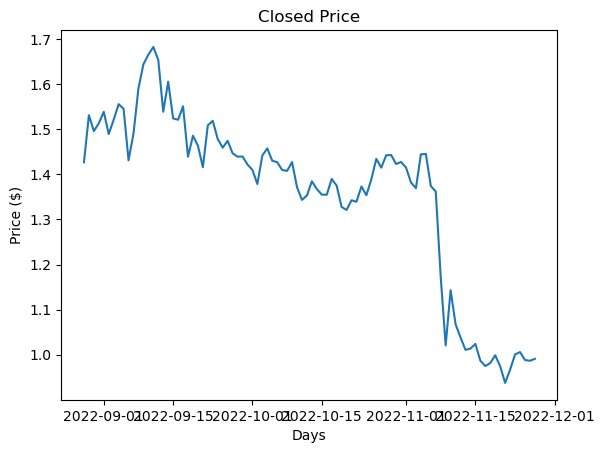

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

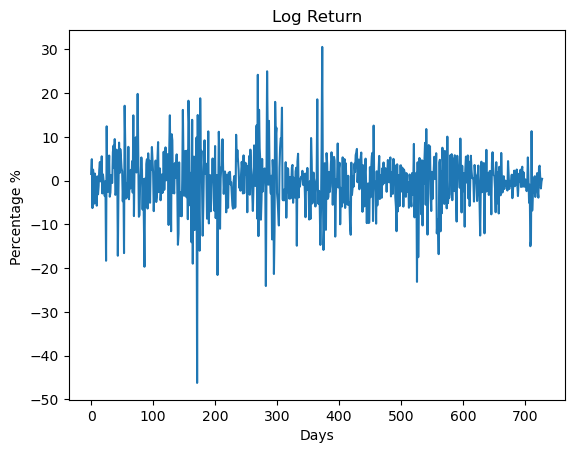

In [19]:
fig = plt.figure()
plt.plot(datalr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

Question 2: Methodology

a. Design a derivative and its associated pricing value

Binomial Tree

In [20]:
import numpy as np
import os

In [21]:
S0 = 1.02              # spot stock price
K = 1.02               # strike
T = 0.25                 # maturity 
r = 0.03                 # risk free rate 
sig = 0.7               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [22]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [23]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [24]:
S

array([[1.02      , 1.24841559, 1.52798186, 1.87015331],
       [0.        , 0.83337633, 1.02      , 1.24841559],
       [0.        , 0.        , 0.68089814, 0.83337633],
       [0.        , 0.        , 0.        , 0.55631803]])

In [25]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4558047378111685

In [26]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.18662367],
       [0.        , 0.        , 0.        , 0.46368197]])

In [27]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.14917982, 0.05499267, 0.        , 0.        ],
       [0.        , 0.22875488, 0.10130614, 0.        ],
       [0.        , 0.        , 0.33655505, 0.18662367],
       [0.        , 0.        , 0.        , 0.46368197]])

In [28]:
print('European ' + payoff, str( V[0,0]))

European put 0.14917982165444413


In [29]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[0.1499303 , 0.05499267, 0.        , 0.        ],
       [0.        , 0.23013738, 0.10130614, 0.        ],
       [0.        , 0.        , 0.33910186, 0.18662367],
       [0.        , 0.        , 0.        , 0.46368197]])

In [30]:
print('American ' + payoff, str( V[0,0]))

American put 0.14993029533496965


Monte Carlo

In [31]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [32]:
T = 0.25
r = 0.03
sigma = 0.7
S0 = 1.02
K = 1.02

In [33]:
S = mcs_simulation_np(1000)

In [34]:
S = np.transpose(S)
S

array([[1.02      , 1.02124313, 1.02040698, ..., 1.5218552 , 1.51908441,
        1.48869693],
       [1.02      , 1.03123539, 1.05159212, ..., 0.48350248, 0.47230795,
        0.48114122],
       [1.02      , 1.03020927, 1.01715397, ..., 1.31778578, 1.31047712,
        1.32708236],
       ...,
       [1.02      , 1.0127942 , 1.00939782, ..., 1.70766575, 1.69534418,
        1.6744934 ],
       [1.02      , 1.01005615, 1.00179927, ..., 1.05637698, 1.0759965 ,
        1.09065988],
       [1.02      , 1.02366532, 1.02325647, ..., 0.75559237, 0.76224644,
        0.76195178]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

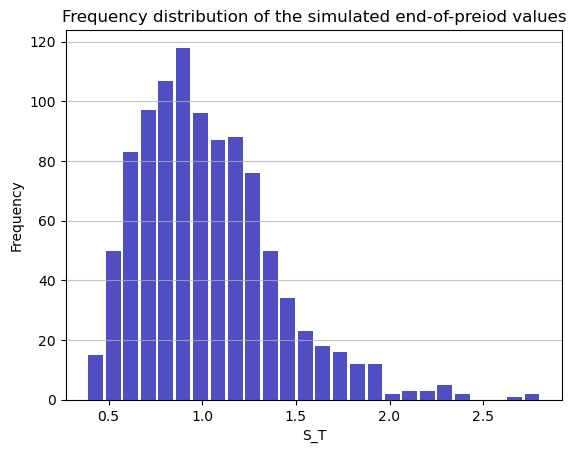

In [35]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [ ]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

Question 3: Calculate and explain its Greek for the risk management purpose

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [37]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put

    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [38]:
euro_option_bsm(0.3, 6.3, 1, 0.03, 0, 0.7, 'call')

1.5764562151926595e-06

In [39]:
euro_option_bsm(0.3, 6.3, 1, 0.03, 0, 0.7, 'put')

5.813808437811817

In [40]:
S = np.linspace(0.3,6.3,7)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 6.3, 1, 0.03, 0, 0.7, 'call')
    Put [i] = euro_option_bsm(S[i], 6.3, 1, 0.03, 0, 0.7, 'put')

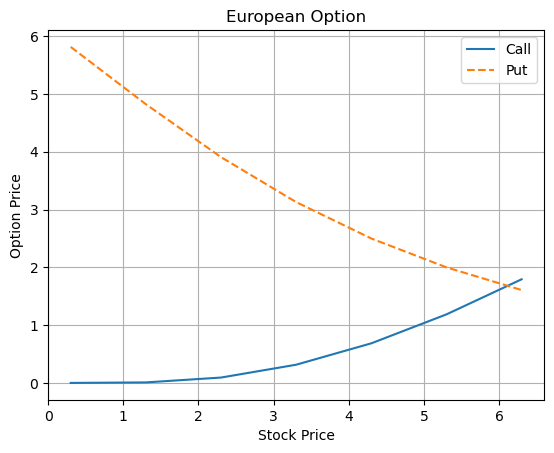

In [41]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

Delta

In [43]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [44]:
delta(0.3, 6.3, 1, 0.03, 0, 0.7, 'put')

-0.9999619657902635

In [45]:
S = np.linspace(0.3,6.3,7)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 6.3, 1, 0.03, 0, 0.7, 'put')

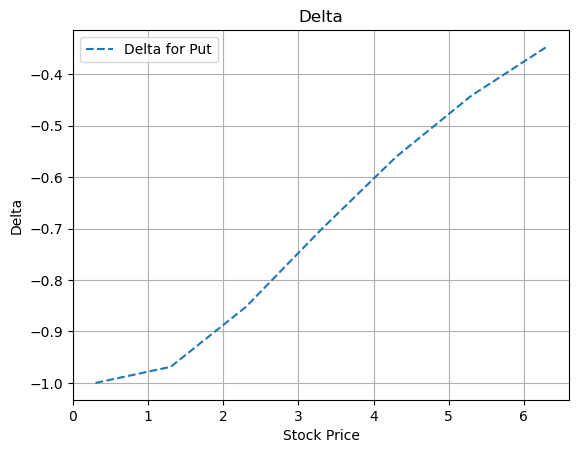

In [59]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

Gamma

In [47]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [48]:
gamma(0.3, 6.3, 1, 0.03, 0, 0.7, 'put')

0.0007578075284691413

In [49]:
S = np.linspace(0.3,6.3,7)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 6.3, 1, 0.03, 0, 0.7, 'put')

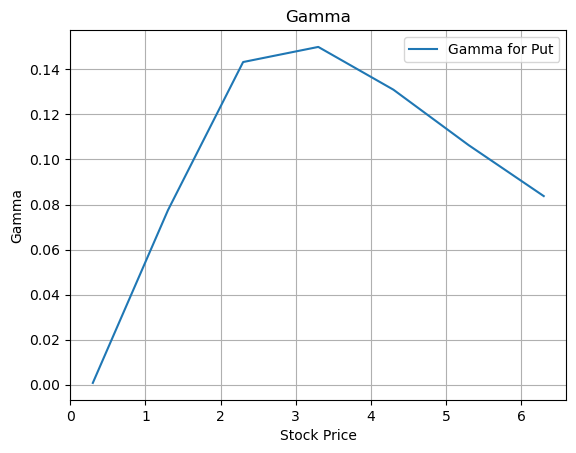

In [50]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

Speed

In [51]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [52]:
speed(0.3, 6.3, 1, 0.03, 0, 0.7, 'put')

0.011751287514429524

In [53]:
S = np.linspace(0.3,6.3,7)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 6.3, 1, 0.03, 0, 0.7, 'put')

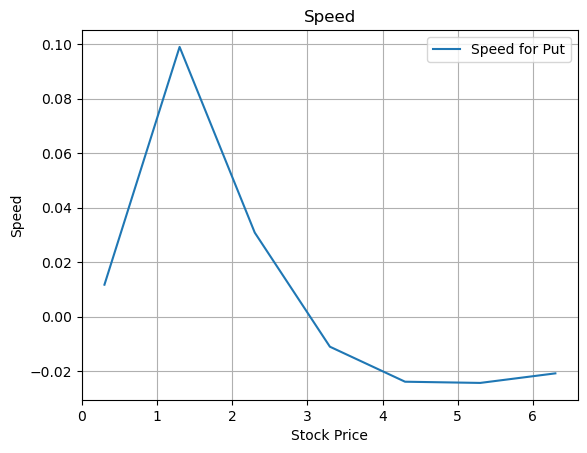

In [54]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

Rho

In [55]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [56]:
rho(0.3, 6.3, 1, 0.03, 0, 0.7, 'put')

-6.1137970275488955

In [57]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(0.3, 6.3, 1, r[i], 0, 0.7, 'put')

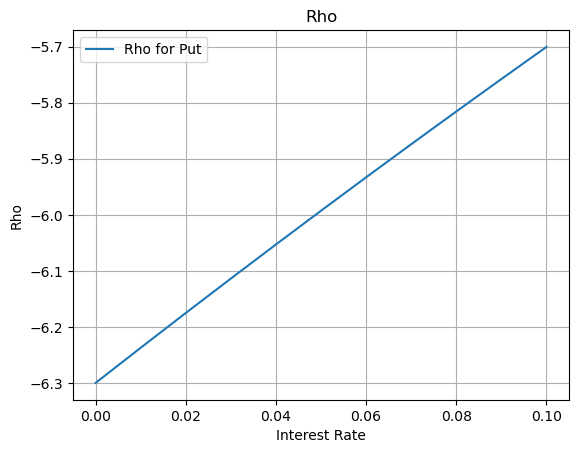

In [60]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

Vega

In [61]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [62]:
vega(0.3, 6.3, 1, 0.03, 0, 0.7, 'put')

4.77418742935559e-05

In [63]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(0.3, 6.3, 1, 0.02, 0, vol[i], 'put')

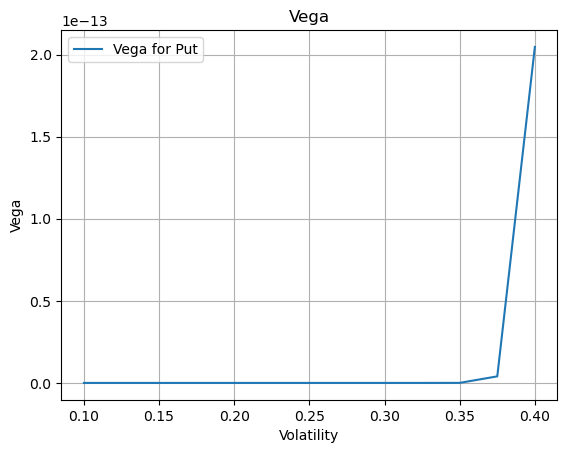

In [64]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])